<a href="https://colab.research.google.com/github/raj-vijay/ml/blob/master/03.Tree-based%20Models/15_Random_Forest_Classifier_Bike_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Random Forests**

- Base estimator: Decision Tree
- Each estimator is trained on a different bootstrap sample having the same size as the training set
- RF introduces further randomization in the training of individual trees
- d features are sampled at each node without replacement
( d < total number of features )

**Random Forests: Classification**

In classification, the model aggregates predictions by majority voting and uses the function RandomForestClassifier from scikit-learn.

**Random Forests: Regression**

In regression, the model aggregates predictions through averaging and uses the function RandomForestRegressor from scikit-learn.

![alt text](https://raw.githubusercontent.com/raj-vijay/ml/master/images/RF%20Training.png)

![alt text](https://raw.githubusercontent.com/raj-vijay/ml/master/images/RF%20Prediction.png)

In [ ]:
!wget https://assets.datacamp.com/production/repositories/1796/datasets/594538f54a854b322d6e4c8031f3f31bc522d3e5/bikes.csv

--2020-05-24 00:00:33--  https://assets.datacamp.com/production/repositories/1796/datasets/594538f54a854b322d6e4c8031f3f31bc522d3e5/bikes.csv
Resolving assets.datacamp.com (assets.datacamp.com)... 13.224.166.92, 13.224.166.65, 13.224.166.96, ...
Connecting to assets.datacamp.com (assets.datacamp.com)|13.224.166.92|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 65272 (64K)
Saving to: ‘bikes.csv’

bikes.csv           100%[===================>]  63.74K   137KB/s    in 0.5s    

2020-05-24 00:00:35 (137 KB/s) - ‘bikes.csv’ saved [65272/65272]



In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv('bikes.csv')

In [ ]:
df.head()

,hr,holiday,workingday,temp,hum,windspeed,cnt,instant,mnth,yr,Clear to partly cloudy,Light Precipitation,Misty
0,0,0,0,0.76,0.66,0.0000,149,13004,7,1,1,0,0
1,1,0,0,0.74,0.70,0.1343,93,13005,7,1,1,0,0
2,2,0,0,0.72,0.74,0.0896,90,13006,7,1,1,0,0
3,3,0,0,0.72,0.84,0.1343,33,13007,7,1,1,0,0
4,4,0,0,0.70,0.79,0.1940,4,13008,7,1,1,0,0


In [ ]:
X = df.drop(['cnt'], axis = 1)

In [ ]:
y = df['cnt']

In [ ]:
# Basic imports
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
# Set seed for reproducibility
SEED = 1

In [ ]:
# Split dataset into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=SEED)

In [ ]:
# Import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

# Instantiate rf
rf = RandomForestRegressor(n_estimators=25,
                           random_state=2)
                           
# Fit rf to the training set            
rf.fit(X_train, y_train)  

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=25, n_jobs=None, oob_score=False,
                      random_state=2, verbose=0, warm_start=False)

In [ ]:
# Import mean_squared_error as MSE
from sklearn.metrics import mean_squared_error as MSE

# Predict the test set labels
y_pred = rf.predict(X_test)

# Evaluate the test set RMSE
rmse_test = MSE(y_test, y_pred)**(1/2)

# Print rmse_test
print('Test set RMSE of rf: {:.2f}'.format(rmse_test))

Test set RMSE of rf: 50.01


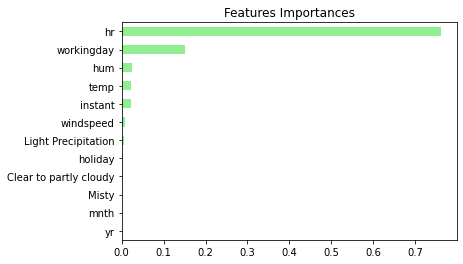

In [ ]:
import matplotlib.pyplot as plt
# Create a pd.Series of features importances
importances = pd.Series(data=rf.feature_importances_,
                        index= X_train.columns)

# Sort importances
importances_sorted = importances.sort_values()

# Draw a horizontal barplot of importances_sorted
importances_sorted.plot(kind='barh', color='lightgreen')
plt.title('Features Importances')
plt.show()